# Gold Price Dataset

The dataset contains the following columns:

| Column Name              | Description                                                      |
|-------------------------|------------------------------------------------------------------|
| **Date**                | The date of the record.                                          |
| **Open**                | The opening price of gold.                                      |
| **High**                | The highest price of gold during the day.                      |
| **Low**                 | The lowest price of gold during the day.                       |
| **Close**               | The closing price of gold.                                      |
| **Adj Close**           | The adjusted closing price of gold (considering dividends and splits). |
| **Volume**              | The volume of trades.                                           |
| **News**                | News headlines associated with gold on that day.               |
| **Price Direction Up**  | Indicator if the price went up.                                 |
| **Price Direction Constant** | Indicator if the price remained constant.                  |
| **Price Direction Down**| Indicator if the price went down.                               |
| **Asset Comparison**     | Whether gold was compared to other assets.                     |
| **Past Information**     | Indicator of past trends being used.                           |
| **Future Information**   | Indicator of future trends being used.                         |
| **Price Sentiment**      | Sentiment analysis of the price (positive, negative, neutral). |


## Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')


## Data collection and processing

In [ ]:
gold_data=pd.read_csv("total_gold data.csv")

In [ ]:
gold_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,News,Price Direction Up,Price Direction Constant,Price Direction Down,Asset Comparision,Past Information,Future Information,Price Sentiment
0,2000-09-07,274.000000,274.000000,274.000000,274.000000,274.000000,125,palladium rallies as gold falls,0,0,1,1,1,0,negative
1,2000-09-08,273.299988,273.299988,273.299988,273.299988,273.299988,0,gold lower in quiet trading,0,0,1,0,1,0,negative
2,2000-09-14,272.399994,272.399994,272.399994,272.399994,272.399994,0,gold steady on dollar's strength,0,1,0,1,1,0,neutral
3,2000-10-10,272.399994,272.399994,272.399994,272.399994,272.399994,13,gold gains on dollar weakness,1,0,0,1,1,0,positive
4,2000-10-16,271.500000,271.500000,271.500000,271.500000,271.500000,5,gold slips for a second-straight day,0,0,1,0,1,0,negative


In [ ]:
print(gold_data.shape)
print(gold_data.info())

(9846, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9846 entries, 0 to 9845
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      9846 non-null   object 
 1   Open                      9846 non-null   float64
 2   High                      9846 non-null   float64
 3   Low                       9846 non-null   float64
 4   Close                     9846 non-null   float64
 5   Adj Close                 9846 non-null   float64
 6   Volume                    9846 non-null   int64  
 7   News                      9846 non-null   object 
 8   Price Direction Up        9846 non-null   int64  
 9   Price Direction Constant  9846 non-null   int64  
 10  Price Direction Down      9846 non-null   int64  
 11  Asset Comparision         9846 non-null   int64  
 12  Past Information          9846 non-null   int64  
 13  Future Information        9846 non-null   int64  
 1

In [ ]:
gold_data.isnull().sum()

Date                        0
Open                        0
High                        0
Low                         0
Close                       0
Adj Close                   0
Volume                      0
News                        0
Price Direction Up          0
Price Direction Constant    0
Price Direction Down        0
Asset Comparision           0
Past Information            0
Future Information          0
Price Sentiment             0
dtype: int64

In [ ]:
gold_data = gold_data.drop(['Adj Close','News','Asset Comparision','Past Information','Future Information'], axis=1)


In [ ]:
gold_data

,Date,Open,High,Low,Close,Volume,Price Direction Up,Price Direction Constant,Price Direction Down,Price Sentiment
0,2000-09-07,274.000000,274.000000,274.000000,274.000000,125,0,0,1,negative
1,2000-09-08,273.299988,273.299988,273.299988,273.299988,0,0,0,1,negative
2,2000-09-14,272.399994,272.399994,272.399994,272.399994,0,0,1,0,neutral
3,2000-10-10,272.399994,272.399994,272.399994,272.399994,13,1,0,0,positive
4,2000-10-16,271.500000,271.500000,271.500000,271.500000,5,0,0,1,negative
...,...,...,...,...,...,...,...,...,...,...
9841,2019-01-28,1300.800049,1307.099976,1298.400024,1302.400024,54,0,1,0,neutral
9842,2019-01-30,1310.400024,1323.400024,1308.099976,1309.900024,54958,1,0,0,positive
9843,2019-01-31,1320.000000,1325.400024,1316.699951,1319.699951,1970,0,0,0,none
9844,2019-01-31,1320.000000,1325.400024,1316.699951,1319.699951,1970,0,0,1,negative


#### Drop duplicated rows

In [ ]:
gold_data = gold_data.drop_duplicates(subset=['Date'])

In [ ]:
gold_data

,Date,Open,High,Low,Close,Volume,Price Direction Up,Price Direction Constant,Price Direction Down,Price Sentiment
0,2000-09-07,274.000000,274.000000,274.000000,274.000000,125,0,0,1,negative
1,2000-09-08,273.299988,273.299988,273.299988,273.299988,0,0,0,1,negative
2,2000-09-14,272.399994,272.399994,272.399994,272.399994,0,0,1,0,neutral
3,2000-10-10,272.399994,272.399994,272.399994,272.399994,13,1,0,0,positive
4,2000-10-16,271.500000,271.500000,271.500000,271.500000,5,0,0,1,negative
...,...,...,...,...,...,...,...,...,...,...
9840,2019-01-25,1297.400024,1297.400024,1297.400024,1297.400024,0,1,0,0,positive
9841,2019-01-28,1300.800049,1307.099976,1298.400024,1302.400024,54,0,1,0,neutral
9842,2019-01-30,1310.400024,1323.400024,1308.099976,1309.900024,54958,1,0,0,positive
9843,2019-01-31,1320.000000,1325.400024,1316.699951,1319.699951,1970,0,0,0,none


In [ ]:
gold_data['Price Sentiment'].value_counts()

Price Sentiment
positive    1441
negative    1227
none         496
neutral      114
Name: count, dtype: int64

#### Maping Price Sentiment

In [ ]:
sentiment_mapping = {
    'positive': 1,
    'neutral': 0,
    'none' : 0 ,
    'negative': -1
}

gold_data.loc[:, 'Price Sentiment'] = gold_data['Price Sentiment'].map(sentiment_mapping)
gold_data['Price Sentiment'] = gold_data['Price Sentiment'].astype(np.float64 )
gold_data.head()


,Date,Open,High,Low,Close,Volume,Price Direction Up,Price Direction Constant,Price Direction Down,Price Sentiment
0,2000-09-07,274.000000,274.000000,274.000000,274.000000,125,0,0,1,-1.0
1,2000-09-08,273.299988,273.299988,273.299988,273.299988,0,0,0,1,-1.0
2,2000-09-14,272.399994,272.399994,272.399994,272.399994,0,0,1,0,0.0
3,2000-10-10,272.399994,272.399994,272.399994,272.399994,13,1,0,0,1.0
4,2000-10-16,271.500000,271.500000,271.500000,271.500000,5,0,0,1,-1.0


In [ ]:
print(gold_data.isnull().sum())
print(gold_data.info())

Date                        0
Open                        0
High                        0
Low                         0
Close                       0
Volume                      0
Price Direction Up          0
Price Direction Constant    0
Price Direction Down        0
Price Sentiment             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 3278 entries, 0 to 9845
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      3278 non-null   object 
 1   Open                      3278 non-null   float64
 2   High                      3278 non-null   float64
 3   Low                       3278 non-null   float64
 4   Close                     3278 non-null   float64
 5   Volume                    3278 non-null   int64  
 6   Price Direction Up        3278 non-null   int64  
 7   Price Direction Constant  3278 non-null   int64  
 8   Price Direction Down      3278

# Visualization

### Line plot
Shows the trend of gold prices over time.

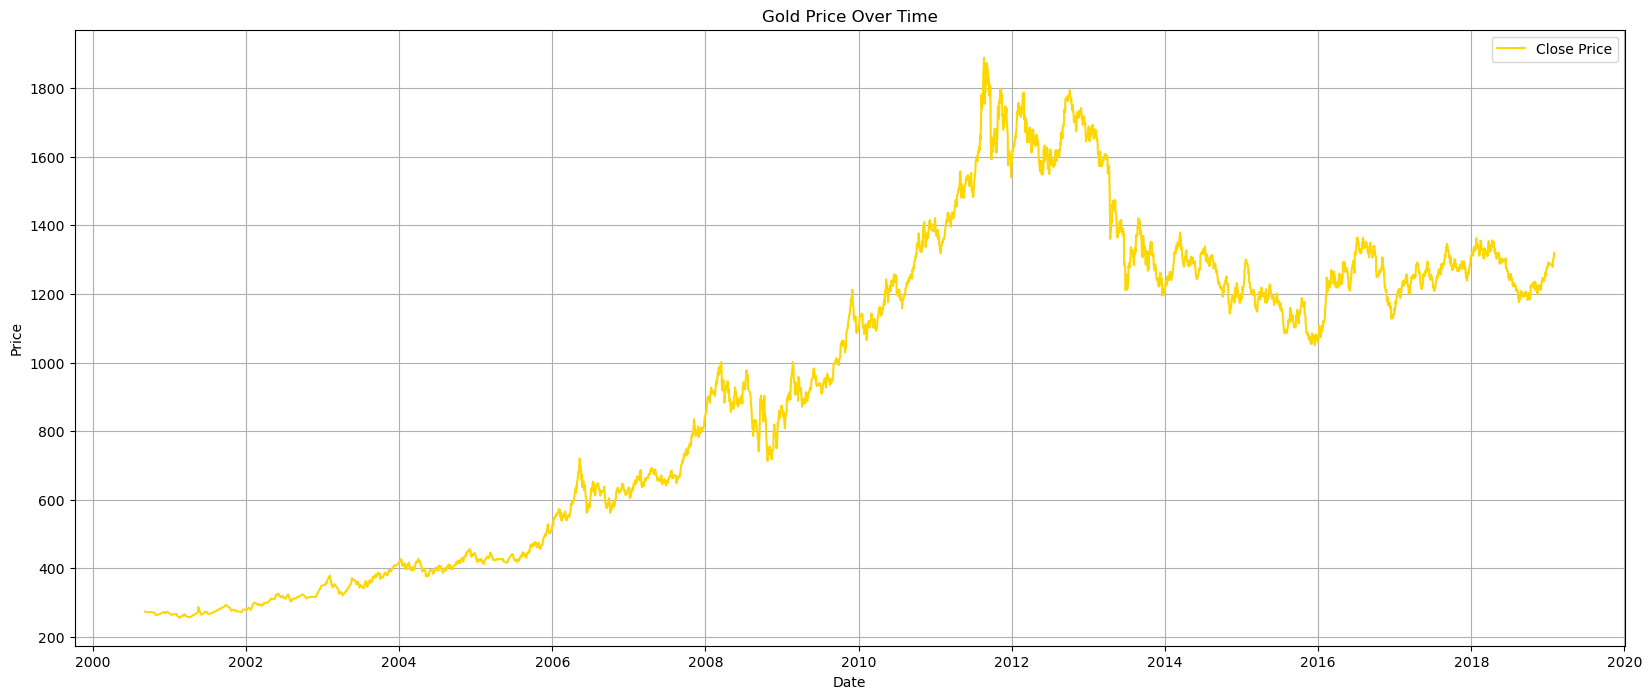

In [ ]:
# Plot the gold prices over time
# Convert the Date column to datetime if not already done
gold_data['Date'] = pd.to_datetime(gold_data['Date'])
plt.figure(figsize=(20, 8))
plt.plot(gold_data['Date'], gold_data['Close'], label='Close Price', color='gold')
plt.title('Gold Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.legend()
plt.show()

### Histogram of Price Distribution:

Displays the frequency distribution of gold prices.


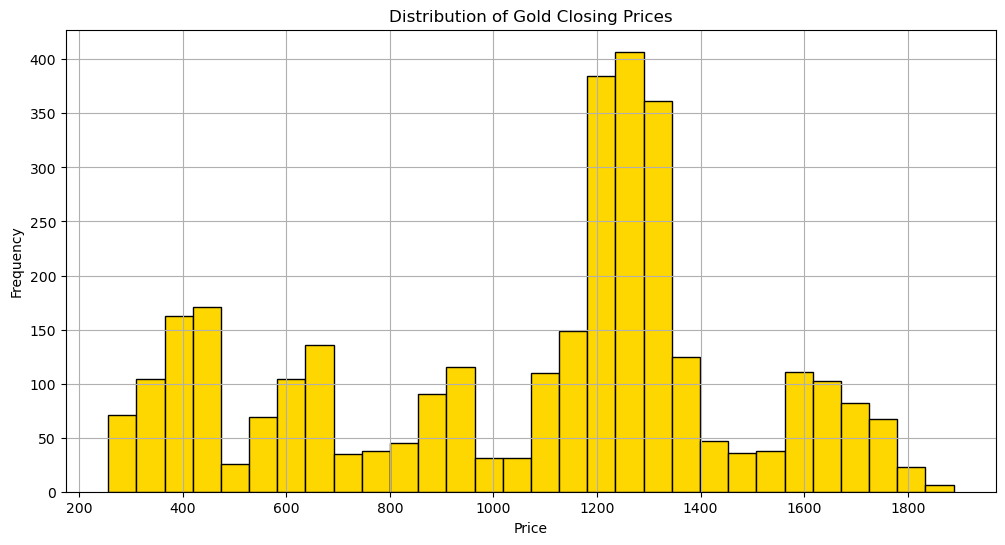

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(gold_data['Close'], bins=30, color='gold', edgecolor='black')
plt.title('Distribution of Gold Closing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid()
plt.show()


#### Scatter Plot of Price vs. Volume:
 shows the relationship between trading volume and prices.


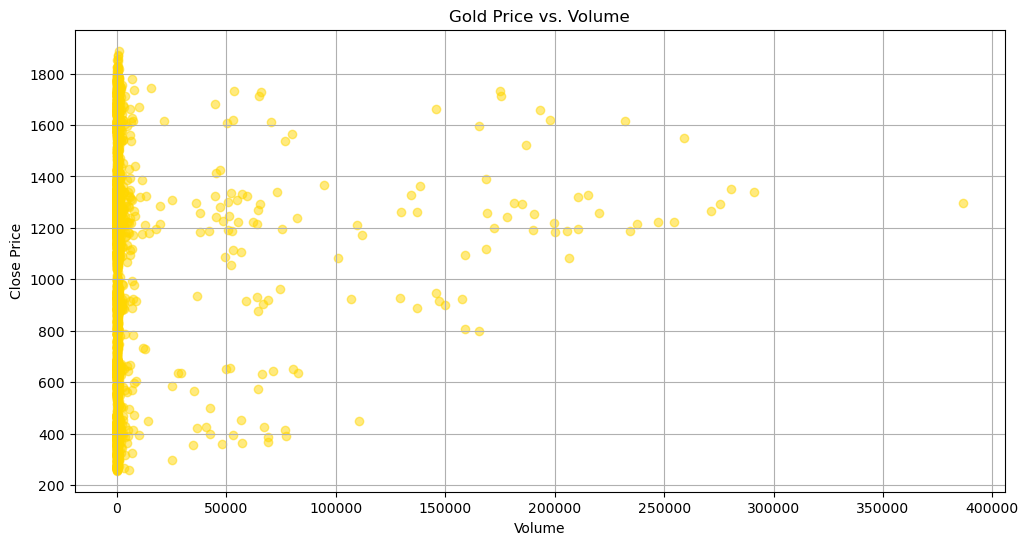

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(gold_data['Volume'], gold_data['Close'], alpha=0.5, color='gold')
plt.title('Gold Price vs. Volume')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.grid()
plt.show()


### Analysis of Volume and Gold Price Correlation

The correlation between volume and gold price is weak, as demonstrated in the scatter plot. Given this weak relationship, it may be a good idea to drop the **Volume** column from the dataset.


- **Action**: Consider removing the **Volume** column from the dataset to streamline analysis and focus on more impactful features.


In [ ]:
gold_data = gold_data.drop(['Volume'], axis=1)

### Box Plot for Price Sentiment Analysis:

Visualizes how different price sentiments affect prices.


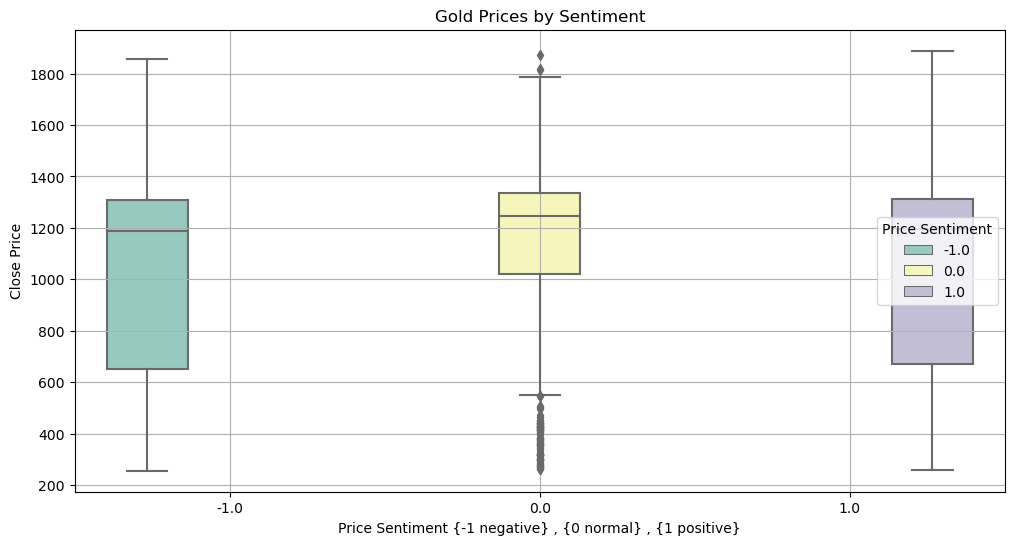

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Price Sentiment', y='Close', data=gold_data,hue='Price Sentiment', palette='Set3')
plt.title('Gold Prices by Sentiment')
plt.xlabel('Price Sentiment {-1 negative} , {0 normal} , {1 positive}')
plt.ylabel('Close Price')
plt.grid()
plt.show()


### Stacked Bar Chart:
This chart displays the relationship between Price Sentiment and Price Direction, showing how different sentiments (Positive, Neutral, Negative) are associated with the counts of price movements (Up, Down, Constant)

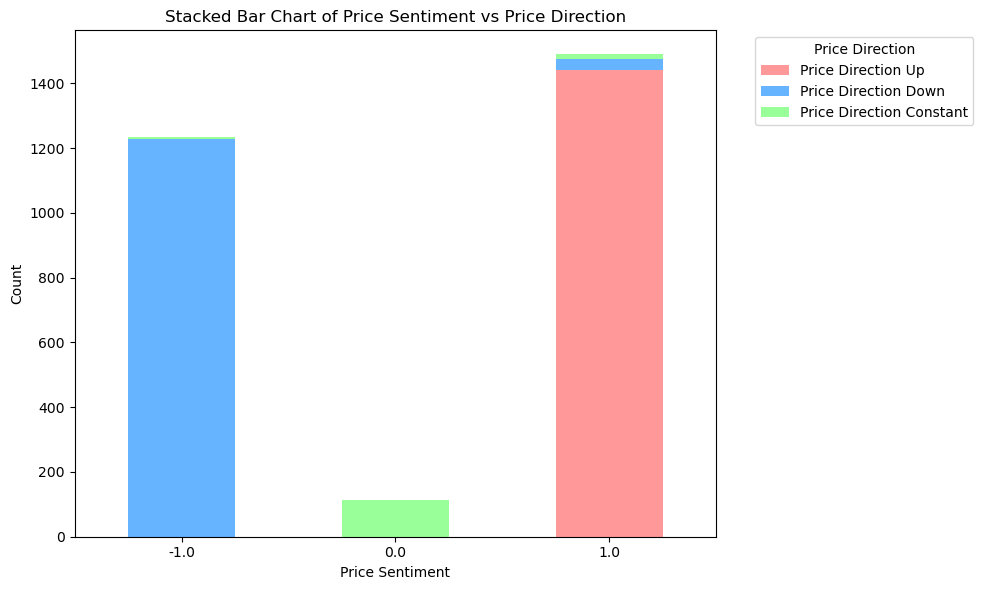

In [ ]:

data_counts = gold_data.groupby('Price Sentiment').agg({
    'Price Direction Up': 'sum',
    'Price Direction Down': 'sum',
    'Price Direction Constant': 'sum'
}).reset_index()

# Set the index to 'Price Sentiment' for easier plotting
data_counts.set_index('Price Sentiment', inplace=True)

# Plotting the stacked bar chart
ax = data_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#ff9999', '#66b3ff', '#99ff99'])

# Customizing the plot
plt.title('Stacked Bar Chart of Price Sentiment vs Price Direction')
plt.xlabel('Price Sentiment')
plt.ylabel('Count')
plt.legend(title='Price Direction', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)  # Rotate x labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

### **Heatmap**:

Great way to visualize the relationships between different features in your dataset

In [ ]:

negative_sentiment_count = gold_data[gold_data['Price Sentiment'] == -1].shape[0]

# Alternatively, if you want a count of all sentiments in a single call
sentiment_counts = gold_data['Price Sentiment'].value_counts()

print("Count of negative sentiment (-1):", negative_sentiment_count)
print("Counts of all sentiments:\n", sentiment_counts)


Count of negative sentiment (-1): 1227
Counts of all sentiments:
 Price Sentiment
 1.0    1441
-1.0    1227
 0.0     610
Name: count, dtype: int64


In [ ]:

gold_data = pd.get_dummies(gold_data, columns=['Price Sentiment'], prefix='Sentiment')
gold_data['Sentiment_-1.0'] = gold_data['Sentiment_-1.0'].astype(np.int64)
gold_data['Sentiment_0.0'] = gold_data['Sentiment_0.0'].astype(np.int64)
gold_data['Sentiment_1.0'] = gold_data['Sentiment_1.0'].astype(np.int64)

In [ ]:
print(gold_data.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Price Direction Up',
       'Price Direction Constant', 'Price Direction Down', 'Sentiment_-1.0',
       'Sentiment_0.0', 'Sentiment_1.0'],
      dtype='object')


In [ ]:
# Calculate the correlation matrix
correlation_matrix = gold_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)

# Set title
plt.title('Correlation Heatmap of Gold Price Dataset')

# Show the plot
plt.show()

NameError: name 'gold_data' is not defined

### Model Training

### Model Training (Regression) Target : Close

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

In [ ]:
gold_data['Date'] = pd.to_datetime(gold_data['Date'])
gold_data['Year'] = gold_data['Date'].dt.year
gold_data['Month'] = gold_data['Date'].dt.month
gold_data['Day'] = gold_data['Date'].dt.day
df10=gold_data.drop(columns="Date")

In [ ]:
X =df10.drop(['Close',"High","Low"], axis=1)
Y =df10['Close']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error (MSE): 104.23069125011506
Mean Absolute Error (MAE): 7.442910206492353


In [ ]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

R-squared: 0.9601693753773188


In [ ]:
results = pd.DataFrame({

    'Actual Value': y_test,
    'Predicted Value': y_pred
})
results['Year'] = gold_data['Year'].iloc[-len(y_test):].values



In [ ]:
grouped_results = results.groupby("Year")[["Actual Value", "Predicted Value"]].mean()
column=["Actual Value","Predicted Value"]

grouped_results.head()

,Actual Value,Predicted Value
Year,,
2016,1276.116559,1276.694295
2017,1257.697213,1257.513542
2018,1267.691464,1269.087886
2019,1293.814287,1293.383065


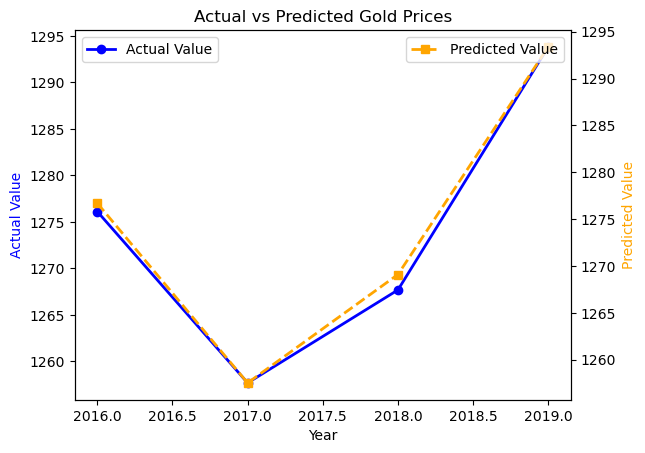

In [ ]:
fig, ax = plt.subplots()


ax.plot(grouped_results.index, grouped_results["Actual Value"],
        color='blue', linestyle='-', marker='o', label='Actual Value', linewidth=2)

ax2 = ax.twinx()

ax2.plot(grouped_results.index, grouped_results["Predicted Value"],
         color='orange', linestyle='--', marker='s', label='Predicted Value', linewidth=2)

# Adding labels and titles
ax.set_xlabel('Year')
ax.set_ylabel('Actual Value', color='blue')
ax2.set_ylabel('Predicted Value', color='orange')
plt.title('Actual vs Predicted Gold Prices')

# Adding legends
ax.legend(loc='upper left')
ax2.legend(loc='upper right')


plt.show()

In [ ]:
gold_data1=pd.read_csv("total_gold data1.csv")
gold_data1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,News,Asset Comparision,Past Information,Future Information,Price Sentiment,Price Direction
0,2000-09-07,274.000000,274.000000,274.000000,274.000000,274.000000,125,palladium rallies as gold falls,1,1,0,negative,Down
1,2000-09-08,273.299988,273.299988,273.299988,273.299988,273.299988,0,gold lower in quiet trading,0,1,0,negative,Down
2,2000-09-14,272.399994,272.399994,272.399994,272.399994,272.399994,0,gold steady on dollar's strength,1,1,0,neutral,Constant
3,2000-10-10,272.399994,272.399994,272.399994,272.399994,272.399994,13,gold gains on dollar weakness,1,1,0,positive,Up
4,2000-10-16,271.500000,271.500000,271.500000,271.500000,271.500000,5,gold slips for a second-straight day,0,1,0,negative,Down


In [ ]:
def get_price_direction(row):
    if row['Price Direction Up'] == 1:
        return 'Up'
    elif row['Price Direction Constant'] == 1:
        return 'Constant'
    elif row['Price Direction Down'] == 1:
        return 'Down'
    else:
        return 'Unknown'

gold_data['Price Direction'] = gold_data.apply(get_price_direction, axis=1)
gold_data.head()

,Date,Open,High,Low,Close,Price Direction Up,Price Direction Constant,Price Direction Down,Sentiment_-1.0,Sentiment_0.0,Sentiment_1.0,Year,Month,Day,Price Direction
0,2000-09-07,274.000000,274.000000,274.000000,274.000000,0,0,1,1,0,0,2000,9,7,Down
1,2000-09-08,273.299988,273.299988,273.299988,273.299988,0,0,1,1,0,0,2000,9,8,Down
2,2000-09-14,272.399994,272.399994,272.399994,272.399994,0,1,0,0,1,0,2000,9,14,Constant
3,2000-10-10,272.399994,272.399994,272.399994,272.399994,1,0,0,0,0,1,2000,10,10,Up
4,2000-10-16,271.500000,271.500000,271.500000,271.500000,0,0,1,1,0,0,2000,10,16,Down


In [ ]:
gold_data.drop(['Price Direction Up', 'Price Direction Constant', 'Price Direction Down'], axis=1, inplace=True)
gold_data.head()

,Date,Open,High,Low,Close,Sentiment_-1.0,Sentiment_0.0,Sentiment_1.0,Year,Month,Day,Price Direction
0,2000-09-07,274.000000,274.000000,274.000000,274.000000,1,0,0,2000,9,7,Down
1,2000-09-08,273.299988,273.299988,273.299988,273.299988,1,0,0,2000,9,8,Down
2,2000-09-14,272.399994,272.399994,272.399994,272.399994,0,1,0,2000,9,14,Constant
3,2000-10-10,272.399994,272.399994,272.399994,272.399994,0,0,1,2000,10,10,Up
4,2000-10-16,271.500000,271.500000,271.500000,271.500000,1,0,0,2000,10,16,Down


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
gold_data['Price Direction'] = label_encoder.fit_transform(gold_data['Price Direction'])


X = gold_data[['Open', 'High', 'Low', 'Close', 'Year', 'Month', 'Day',"Sentiment_-1.0","Sentiment_0.0","Sentiment_1.0"]]  # Use relevant features
y = gold_data['Price Direction']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 95.58%


# Time series models

In [ ]:
import pandas as pd


gold_data=pd.read_csv("/content/total_gold data1.csv")

# Displaying the first few rows and data structure
print(gold_data.info())
print(gold_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9846 entries, 0 to 9845
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                9846 non-null   object 
 1   Open                9846 non-null   float64
 2   High                9846 non-null   float64
 3   Low                 9846 non-null   float64
 4   Close               9846 non-null   float64
 5   Adj Close           9846 non-null   float64
 6   Volume              9846 non-null   int64  
 7   News                9846 non-null   object 
 8   Asset Comparision   9846 non-null   int64  
 9   Past Information    9846 non-null   int64  
 10  Future Information  9846 non-null   int64  
 11  Price Sentiment     9846 non-null   object 
 12  Price Direction     9846 non-null   object 
dtypes: float64(5), int64(4), object(4)
memory usage: 1000.1+ KB
None
         Date        Open        High         Low       Close   Adj Close  \
0  2000-09-

In [ ]:
# Converting 'Date' column to datetime and set it as the index
gold_data['Date'] = pd.to_datetime(gold_data['Date'])
gold_data.set_index('Date', inplace=True)

# Checking for any duplicates in the dates
duplicate_dates = gold_data.index[gold_data.index.duplicated()]
print(f"Number of duplicate dates: {len(duplicate_dates)}")

# Print the duplicate entries to inspect them
print(gold_data[gold_data.index.isin(duplicate_dates)])


Number of duplicate dates: 6568
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2001-10-17   282.200012   283.399994   282.200012   283.399994   283.399994   
2001-10-17   282.200012   283.399994   282.200012   283.399994   283.399994   
2002-05-09   307.500000   309.500000   307.500000   309.500000   309.500000   
2002-05-09   307.500000   309.500000   307.500000   309.500000   309.500000   
2002-05-10   311.000000   311.000000   311.000000   311.000000   311.000000   
...                 ...          ...          ...          ...          ...   
2019-01-04  1294.199951  1294.199951  1275.300049  1282.699951  1282.699951   
2019-01-09  1279.400024  1289.300049  1279.199951  1289.300049  1289.300049   
2019-01-09  1279.400024  1289.300049  1279.199951  1289.300049  1289.300049   
2019-01-31  1320.000000  1325.400024  1316.699951  1319.699951  1319.699951   
2019-01-31  1320.000

In [ ]:
# Removing duplicate dates, keeping only the first occurrence of each
gold_data_cleaned = gold_data[~gold_data.index.duplicated(keep='first')]

# Verifying the number of rows after removing duplicates
print(f"Number of rows after removing duplicates: {len(gold_data_cleaned)}")


Number of rows after removing duplicates: 3278


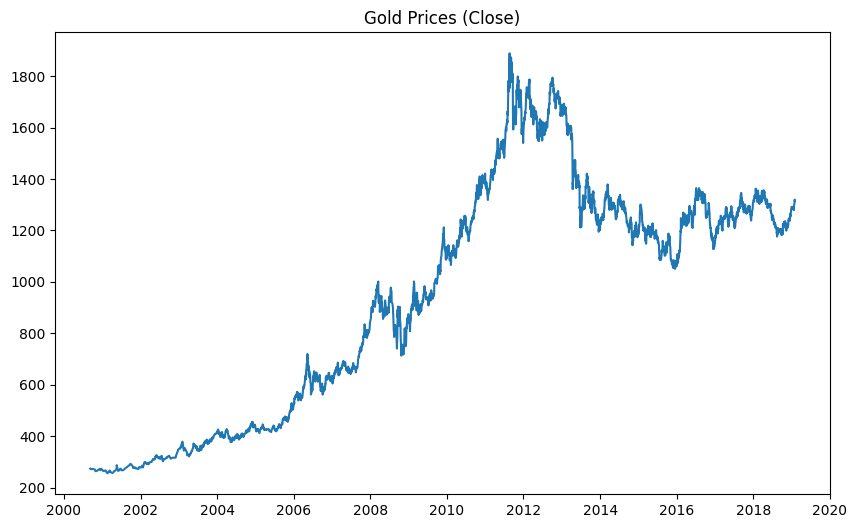

ADF Statistic: -1.8375077748355195
p-value: 0.36200545419422625


In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Plotting the 'Close' price to visualize the trend
plt.figure(figsize=(10, 6))
plt.plot(gold_data_cleaned['Close'])
plt.title('Gold Prices (Close)')
plt.show()

# Performing the Augmented Dickey-Fuller test
adf_test = adfuller(gold_data_cleaned['Close'])
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")


<ipython-input-7-c7429508c811>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gold_data_cleaned['Close_diff'] = gold_data_cleaned['Close'].diff().dropna()


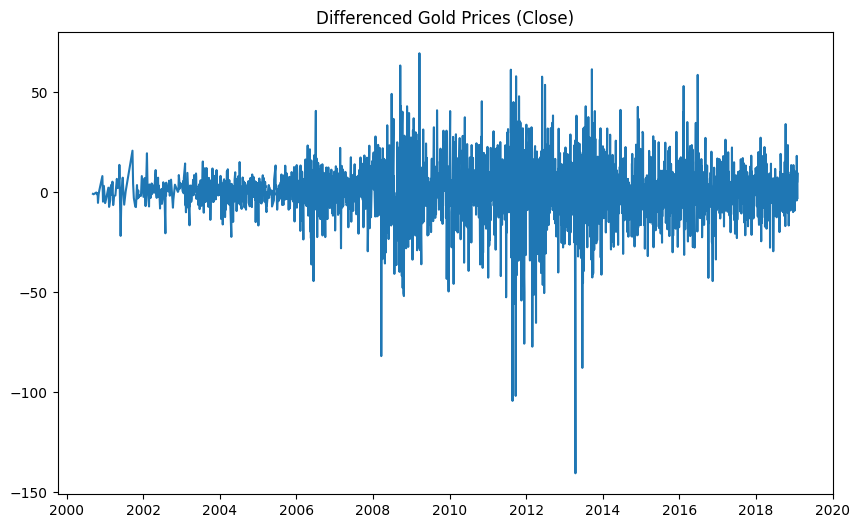

ADF Statistic (Differenced): -57.50608595235856
p-value (Differenced): 0.0


In [ ]:
# Applying first differencing to make the series stationary
gold_data_cleaned['Close_diff'] = gold_data_cleaned['Close'].diff().dropna()

# Plotting the differenced 'Close' price
plt.figure(figsize=(10, 6))
plt.plot(gold_data_cleaned['Close_diff'])
plt.title('Differenced Gold Prices (Close)')
plt.show()

# Performing the ADF test on the differenced data
adf_test_diff = adfuller(gold_data_cleaned['Close_diff'].dropna())
print(f"ADF Statistic (Differenced): {adf_test_diff[0]}")
print(f"p-value (Differenced): {adf_test_diff[1]}")

# If p-value < 0.05, the differenced series is stationary


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Defining the order of the ARIMA model (p, d, q)
p, d, q = 1, 1, 1  # Try (1, 1, 1) initially, you can tune these later

# Fitting the ARIMA model on the original (non-differenced) 'Close' price
model = ARIMA(gold_data_cleaned['Close'], order=(p, d, q))
model_fit = model.fit()

# Displaying the model summary
print(model_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3278
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -13256.463
Date:                Tue, 22 Oct 2024   AIC                          26518.926
Time:                        10:18:58   BIC                          26537.210
Sample:                             0   HQIC                         26525.473
                               - 3278                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9368      0.046     20.387      0.000       0.847       1.027
ma.L1         -0.9465      0.042    -22.300      0.000      -1.030      -0.863
sigma2       191.1007      2.095     91.199      0.0

In [ ]:
# Forecasting future values (e.g., next 10 periods)
forecast = model_fit.forecast(steps=10)

# Printing the forecasted values
print("Forecasted values for the next 10 periods:")
print(forecast)

Forecasted values for the next 10 periods:
3278    1316.419564
3279    1315.969450
3280    1315.547765
3281    1315.152716
3282    1314.782618
3283    1314.435896
3284    1314.111074
3285    1313.806768
3286    1313.521683
3287    1313.254604
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<ipython-input-10-4cf9957d1bf8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gold_data_cleaned['Forecast'] = model_fit.predict(start=0, end=len(gold_data_cleaned)-1)


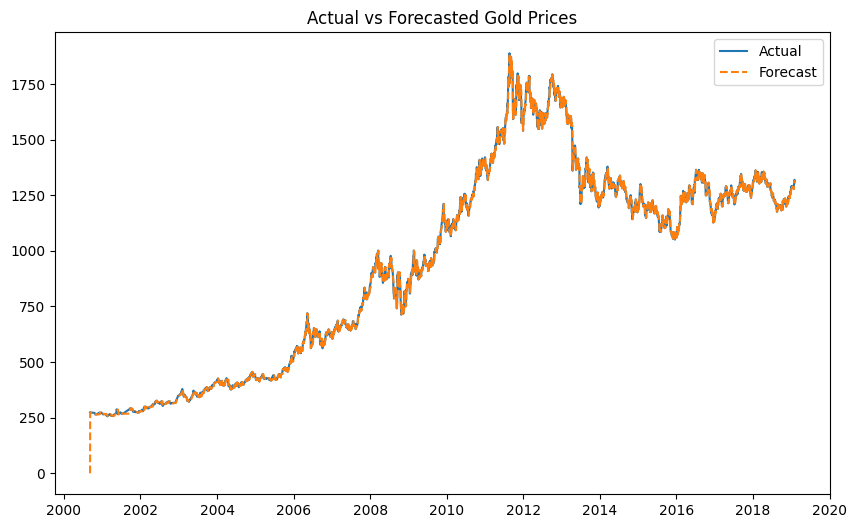

In [ ]:
# Plotting the actual vs forecasted values (for training period)
gold_data_cleaned['Forecast'] = model_fit.predict(start=0, end=len(gold_data_cleaned)-1)

plt.figure(figsize=(10, 6))
plt.plot(gold_data_cleaned['Close'], label='Actual')
plt.plot(gold_data_cleaned['Forecast'], label='Forecast', linestyle='--')
plt.title('Actual vs Forecasted Gold Prices')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(gold_data_cleaned['Close'], gold_data_cleaned['Forecast'])
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 213.93190397444275


In [ ]:
from sklearn.metrics import mean_absolute_error
import numpy as np

# Mean Absolute Error (MAE)
mae = mean_absolute_error(gold_data_cleaned['Close'], gold_data_cleaned['Forecast'])
print(f'Mean Absolute Error: {mae}')

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)  # You already have MSE calculated
print(f'Root Mean Squared Error: {rmse}')


Mean Absolute Error: 9.299426055567112
Root Mean Squared Error: 14.626411178906558


In [ ]:
import itertools
import warnings
warnings.filterwarnings('ignore')  # Ignore warnings for simplicity

# Defining the p, d, q ranges
p = range(0, 3)  # Testing values from 0 to 2 for 'p'
d = range(0, 2)  # Testing values from 0 to 1 for 'd'
q = range(0, 3)  # Testing values from 0 to 2 for 'q'

# Creating a list of all possible combinations of p, d, q values
pdq = list(itertools.product(p, d, q))

# Looping through all the combinations, fitting a model each time
best_aic = float('inf')
best_pdq = None
best_model = None

for param in pdq:
    try:
        model = ARIMA(gold_data_cleaned['Close'], order=param)
        model_fit = model.fit()
        if model_fit.aic < best_aic:
            best_aic = model_fit.aic
            best_pdq = param
            best_model = model_fit
    except:
        continue

# Displaying the best model's parameters and AIC score
print(f'Best ARIMA Model: ARIMA{best_pdq} - AIC:{best_aic}')


Best ARIMA Model: ARIMA(0, 1, 0) - AIC:26517.396339539773


Best ARIMA Model: ARIMA(0, 1, 0) - AIC: 26517.396339539773


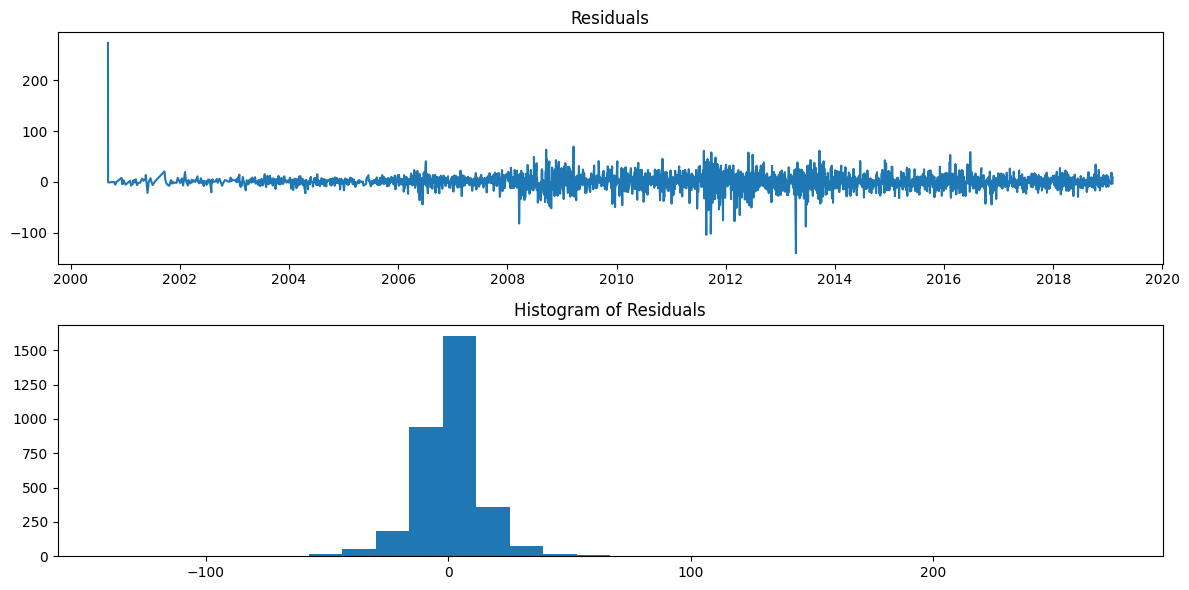

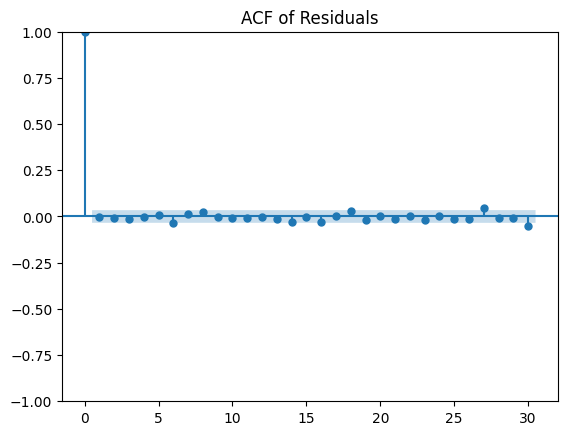

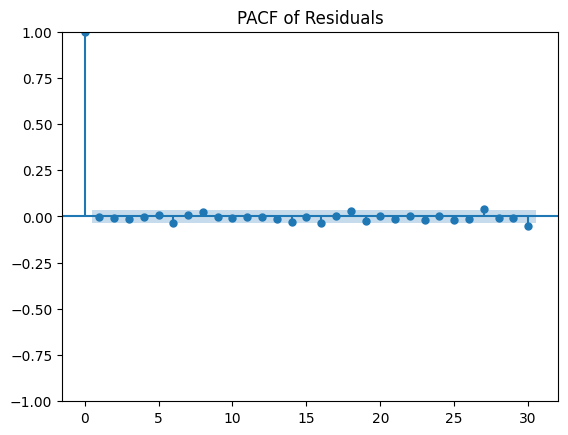

     lb_stat  lb_pvalue
10  7.797482   0.648611


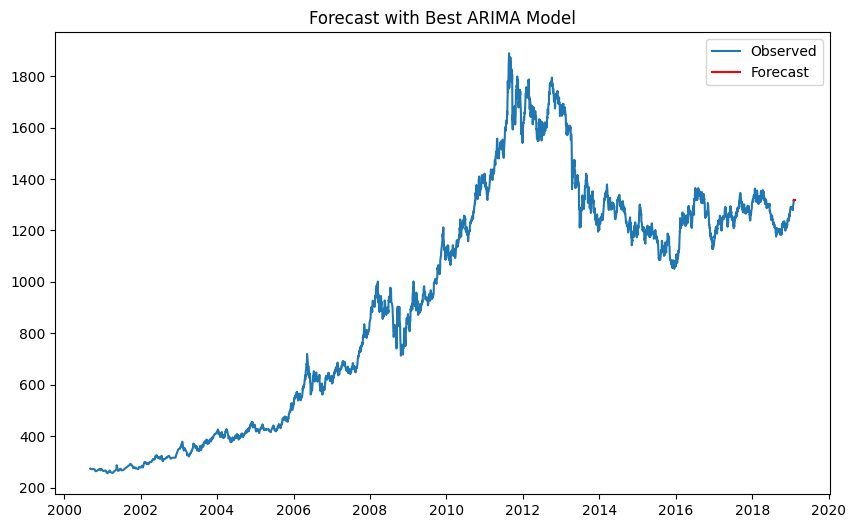

In [ ]:
import itertools
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Ignoring warnings for simplicity
warnings.filterwarnings('ignore')



# Defining the p, d, q ranges
p = range(0, 3)  # You can expand this range if needed
d = range(0, 2)
q = range(0, 3)

# Creating a list of all possible combinations of p, d, q values
pdq = list(itertools.product(p, d, q))

# Looping through all combinations and fit models
best_aic = float('inf')
best_pdq = None
best_model = None

for param in pdq:
    try:
        model = ARIMA(gold_data_cleaned['Close'], order=param)
        model_fit = model.fit()
        if model_fit.aic < best_aic:
            best_aic = model_fit.aic
            best_pdq = param
            best_model = model_fit
    except:
        continue

# Displaying the best model's parameters and AIC score
print(f'Best ARIMA Model: ARIMA{best_pdq} - AIC: {best_aic}')

# Refitting the best model
best_model_refit = ARIMA(gold_data_cleaned['Close'], order=best_pdq).fit()

# Checking residuals
residuals = best_model_refit.resid
plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(residuals)
plt.title('Residuals')
plt.subplot(212)
plt.hist(residuals, bins=30)
plt.title('Histogram of Residuals')
plt.tight_layout()
plt.show()

# ACF and PACF plots for residuals
plot_acf(residuals, lags=30)
plt.title('ACF of Residuals')
plt.show()

plot_pacf(residuals, lags=30)
plt.title('PACF of Residuals')
plt.show()

# Ljung-Box test for autocorrelation in residuals
lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print(lb_test)

# Forecasting with the best model
forecast = best_model_refit.get_forecast(steps=10)
forecast_index = pd.date_range(start=gold_data_cleaned.index[-1], periods=10, freq='D')  # Adjust frequency as needed
forecast_values = forecast.predicted_mean
plt.figure(figsize=(10, 6))
plt.plot(gold_data_cleaned['Close'], label='Observed')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red')
plt.title('Forecast with Best ARIMA Model')
plt.legend()
plt.show()


In [ ]:
# Refitting the best model
best_model = ARIMA(gold_data_cleaned['Close'], order=(0, 1, 0))
best_model_fit = best_model.fit()

# Forecasting the values using the new model
gold_data_cleaned['Forecast'] = best_model_fit.predict(start=0, end=len(gold_data_cleaned)-1)

# Calculating performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Mean Squared Error (MSE)
mse_best = mean_squared_error(gold_data_cleaned['Close'], gold_data_cleaned['Forecast'])
print(f'Mean Squared Error (Best Model): {mse_best}')

# Mean Absolute Error (MAE)
mae_best = mean_absolute_error(gold_data_cleaned['Close'], gold_data_cleaned['Forecast'])
print(f'Mean Absolute Error (Best Model): {mae_best}')

# Root Mean Squared Error (RMSE)
rmse_best = np.sqrt(mse_best)
print(f'Root Mean Squared Error (Best Model): {rmse_best}')


Mean Squared Error (Best Model): 214.0763683797237
Mean Absolute Error (Best Model): 9.295576504049249
Root Mean Squared Error (Best Model): 14.631348822980186


3278    1316.900024
3279    1316.900024
3280    1316.900024
3281    1316.900024
3282    1316.900024
3283    1316.900024
3284    1316.900024
3285    1316.900024
3286    1316.900024
3287    1316.900024
3288    1316.900024
3289    1316.900024
3290    1316.900024
3291    1316.900024
3292    1316.900024
3293    1316.900024
3294    1316.900024
3295    1316.900024
3296    1316.900024
3297    1316.900024
3298    1316.900024
3299    1316.900024
3300    1316.900024
3301    1316.900024
3302    1316.900024
3303    1316.900024
3304    1316.900024
3305    1316.900024
3306    1316.900024
3307    1316.900024
Name: predicted_mean, dtype: float64


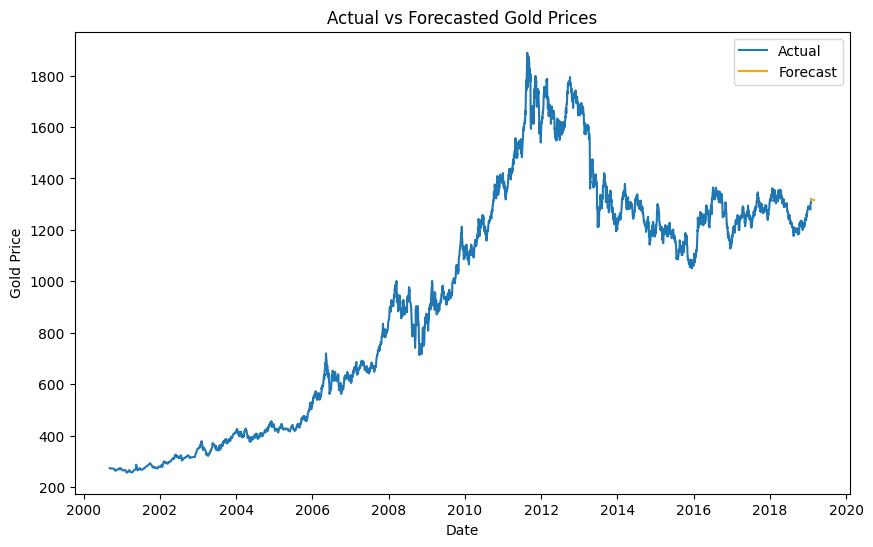

In [ ]:
# Forecasting the next 30 days
forecast_steps = 30  # You can adjust this number based on how many future periods you'd like to forecast
forecast = best_model_fit.forecast(steps=forecast_steps)

# Printing the forecasted values
print(forecast)

# Plotting the forecasted future values along with the historical data
plt.figure(figsize=(10, 6))
plt.plot(gold_data_cleaned.index, gold_data_cleaned['Close'], label='Actual')
plt.plot(pd.date_range(start=gold_data_cleaned.index[-1], periods=forecast_steps+1, freq='D')[1:],
         forecast, label='Forecast', color='orange')
plt.legend()
plt.title('Actual vs Forecasted Gold Prices')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.show()


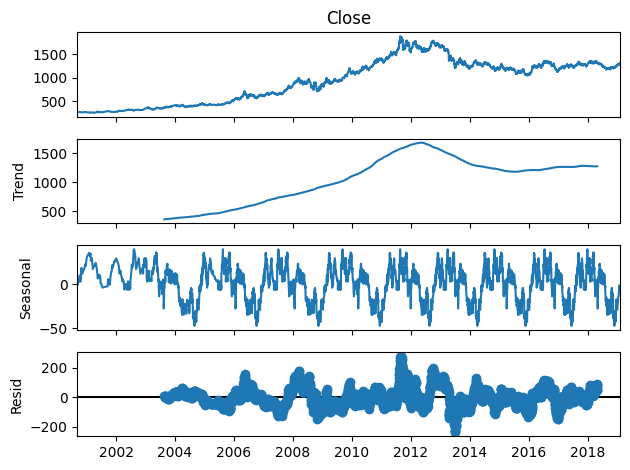

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Performing seasonal decomposition (using 'Close' column)
result = seasonal_decompose(gold_data_cleaned['Close'], model='additive', period=365)

# Plotting the decomposed components (trend, seasonality, and residuals)
result.plot()
plt.show()


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fitting SARIMA model again to make sure it's optimal
sarima_model = SARIMAX(gold_data_cleaned['Close'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit()

# Summary of SARIMA results
print(sarima_fit.summary())




                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 3278
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -13237.370
Date:                            Tue, 22 Oct 2024   AIC                          26484.740
Time:                                    10:21:15   BIC                          26515.195
Sample:                                         0   HQIC                         26495.648
                                           - 3278                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9388      0.044     21.145      0.000       0.852       1.026
ma.L1         -0.9489      0.041   

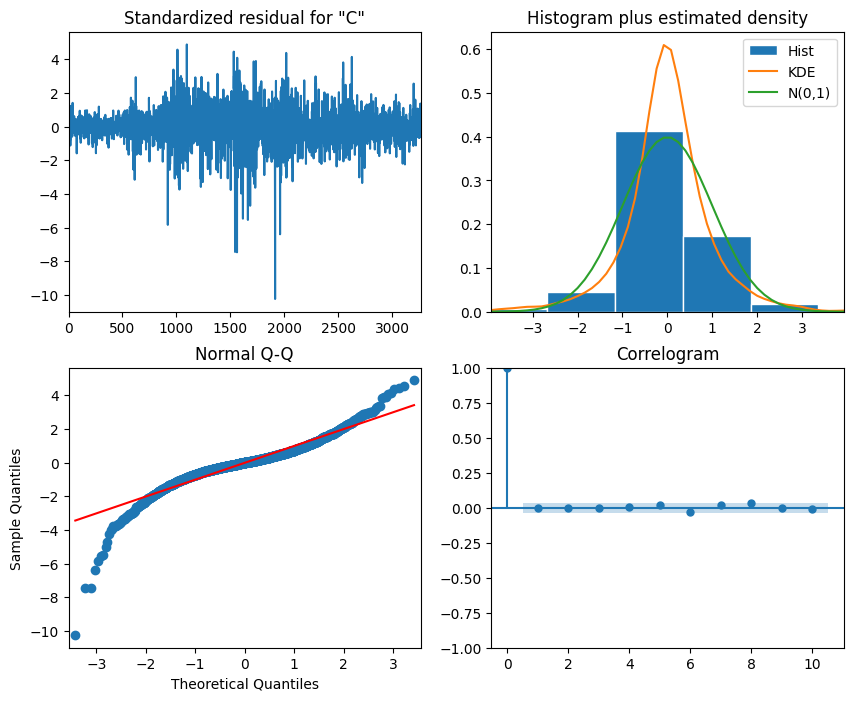

In [ ]:
# Plotting diagnostics
sarima_fit.plot_diagnostics(figsize=(10, 8))
plt.show()



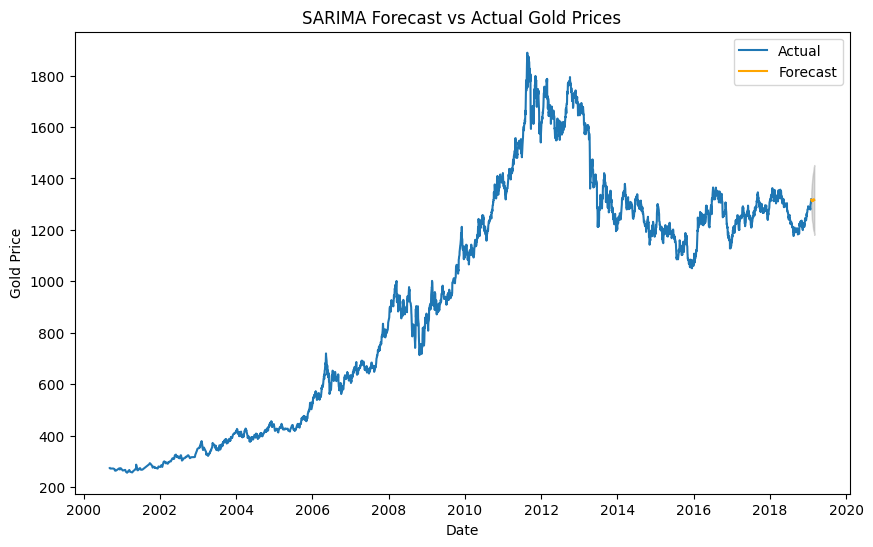

In [ ]:
# Forecasting next 30 days
forecast_steps = 30
forecast = sarima_fit.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean

# Confidence intervals for forecasts
conf_int = forecast.conf_int()
# Plotting the forecast
plt.figure(figsize=(10, 6))
plt.plot(gold_data_cleaned.index, gold_data_cleaned['Close'], label='Actual')
plt.plot(pd.date_range(start=gold_data_cleaned.index[-1], periods=forecast_steps+1, freq='D')[1:],
         forecast_values, label='Forecast', color='orange')
plt.fill_between(pd.date_range(start=gold_data_cleaned.index[-1], periods=forecast_steps+1, freq='D')[1:],
                 conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='gray', alpha=0.3)
plt.legend()
plt.title('SARIMA Forecast vs Actual Gold Prices')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.show()



In [ ]:
# Forecasting the next 30 days
forecast_steps = 30  # Adjust this based on how many days you want to forecast
forecast = sarima_fit.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean  # Get forecasted values
forecast_conf_int = forecast.conf_int()  # Confidence intervals for forecast

# Printing the forecasted values
print("Forecasted Gold Prices for the next 30 days:")
print(forecast_values)

# Printing confidence intervals
print("\nConfidence Intervals for the forecast:")
print(forecast_conf_int)


Forecasted Gold Prices for the next 30 days:
3278    1316.906744
3279    1316.056488
3280    1314.684043
3281    1314.169946
3282    1313.849290
3283    1312.566272
3284    1312.076368
3285    1311.498244
3286    1312.939001
3287    1313.968703
3288    1314.658359
3289    1316.936555
3290    1317.148941
3291    1316.522612
3292    1315.358623
3293    1315.028070
3294    1314.882021
3295    1313.760018
3296    1313.417156
3297    1313.027739
3298    1314.613295
3299    1315.786087
3300    1316.617013
3301    1318.996693
3302    1319.314777
3303    1318.787609
3304    1317.716716
3305    1317.473593
3306    1317.409619
3307    1316.364676
Name: predicted_mean, dtype: float64

Confidence Intervals for the forecast:
      lower Close  upper Close
3278  1289.799948  1344.013541
3279  1277.913972  1354.199004
3280  1268.194750  1361.173335
3281  1260.738284  1367.601608
3282  1254.378297  1373.320284
3283  1247.699943  1377.432600
3284  1242.303718  1381.849018
3285  1237.206622  1385.789866

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Performing ADF Test
adf_result = adfuller(gold_data['Close'])  # 'Close' is your target variable

print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:', adf_result[4])


if adf_result[1] > 0.05:
    print("The series is non-stationary; differencing may be needed.")
else:
    print("The series is stationary.")



ADF Statistic: -2.6202760366303566
p-value: 0.08887861341389008
Critical Values: {'1%': -3.431016905820327, '5%': -2.861834732066135, '10%': -2.5669268807502914}
The series is non-stationary; differencing may be needed.


In [ ]:
# Applying differencing
data_diff = gold_data['Close'].diff().dropna()

# Re-running ADF Test on differenced data
adf_result_diff = adfuller(data_diff)

print('ADF Statistic after Differencing:', adf_result_diff[0])
print('p-value after Differencing:', adf_result_diff[1])
print('Critical Values:', adf_result_diff[4])

# Interpretation
if adf_result_diff[1] > 0.05:
    print("The differenced series is still non-stationary.")
else:
    print("The differenced series is now stationary.")


# Re-running ADF Test on differenced data
adf_result_diff = adfuller(data_diff)

print('ADF Statistic after Differencing:', adf_result_diff[0])
print('p-value after Differencing:', adf_result_diff[1])
print('Critical Values:', adf_result_diff[4])

# Interpretation
if adf_result_diff[1] > 0.05:
    print("The differenced series is still non-stationary.")
else:
    print("The differenced series is now stationary.")


ADF Statistic after Differencing: -15.76548680444879
p-value after Differencing: 1.1778595449074235e-28
Critical Values: {'1%': -3.431016905820327, '5%': -2.861834732066135, '10%': -2.5669268807502914}
The differenced series is now stationary.
ADF Statistic after Differencing: -15.76548680444879
p-value after Differencing: 1.1778595449074235e-28
Critical Values: {'1%': -3.431016905820327, '5%': -2.861834732066135, '10%': -2.5669268807502914}
The differenced series is now stationary.


In [ ]:
pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.3 MB/s eta 0:00:00


In [ ]:
import pmdarima as pm

# Auto ARIMA to find the best SARIMA parameters
auto_model = pm.auto_arima(gold_data['Close'],
                           seasonal=True,
                           m=12,  # Assuming monthly seasonality
                           d=1,  # Already differenced
                           D=1,  # Seasonal differencing
                           trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

# Printing the summary of the best model found
print(auto_model.summary())



Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=inf, Time=96.47 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=75346.649, Time=0.49 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=72599.869, Time=3.91 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=21.20 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=75348.536, Time=0.45 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=71293.146, Time=11.38 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=101.86 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=40.84 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=71291.171, Time=6.37 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=72598.531, Time=4.77 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=63.88 sec


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming best SARIMA model is (1, 1, 1)x(1, 1, 1, 12)
final_model = SARIMAX(gold_data['Close'],
                      order=(1, 1, 1),
                      seasonal_order=(1, 1, 1, 12),
                      enforce_stationarity=False,
                      enforce_invertibility=False)

# Fitting the model
sarima_fit = final_model.fit(disp=False)

# Printing the model summary
print(sarima_fit.summary())


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 9846
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -34365.279
Date:                            Tue, 22 Oct 2024   AIC                          68740.558
Time:                                    10:22:35   BIC                          68776.518
Sample:                                         0   HQIC                         68752.741
                                           - 9846                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5544      0.467      1.187      0.235      -0.361       1.470
ma.L1         -0.5624      0.463   

In [ ]:
# Forecasting the next 12 months
forecast = sarima_fit.get_forecast(steps=12)

# Getting confidence intervals
confidence_intervals = forecast.conf_int()

# Predicted values
predicted_values = forecast.predicted_mean

# Printting forecast and confidence intervals
print(predicted_values)
print(confidence_intervals)


9846    1316.742208
9847    1316.711776
9848    1317.002910
9849    1317.130728
9850    1317.207839
9851    1317.366264
9852    1318.078719
9853    1318.393913
9854    1318.740941
9855    1318.654888
9856    1318.473685
9857    1318.319459
Name: predicted_mean, dtype: float64
      lower Close  upper Close
9846  1301.087242  1332.397174
9847  1294.660732  1338.762820
9848  1290.072140  1343.933681
9849  1286.096957  1348.164500
9850  1282.562992  1351.852686
9851  1279.457539  1355.274989
9852  1277.168140  1358.989298
9853  1274.688450  1362.099375
9854  1272.409554  1365.072329
9855  1269.838978  1367.470798
9856  1267.293909  1369.653461
9857  1264.880378  1371.758539


### classification model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
gold_data['Price Direction'] = label_encoder.fit_transform(gold_data['Price Direction'])


X = gold_data[['Open', 'High', 'Low', 'Close', 'Year', 'Month', 'Day',"Sentiment_-1.0","Sentiment_0.0","Sentiment_1.0"]]  # Use relevant features
y = gold_data['Price Direction']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 95.12%


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)


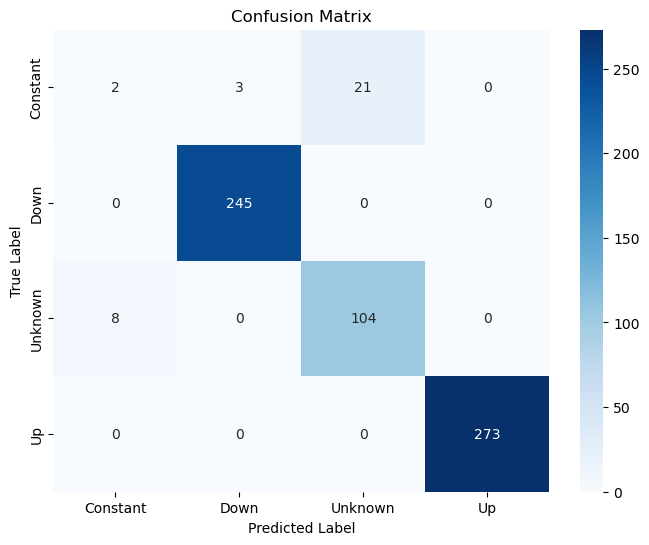

In [ ]:

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
# Binarize the output
y_test_binarized = label_binarize(y_test, classes=range(len(label_encoder.classes_)))


In [ ]:
# Train OneVsRest classifier
ovr_classifier = OneVsRestClassifier(model)
y_pred_prob = ovr_classifier.fit(X_train, y_train).predict_proba(X_test)

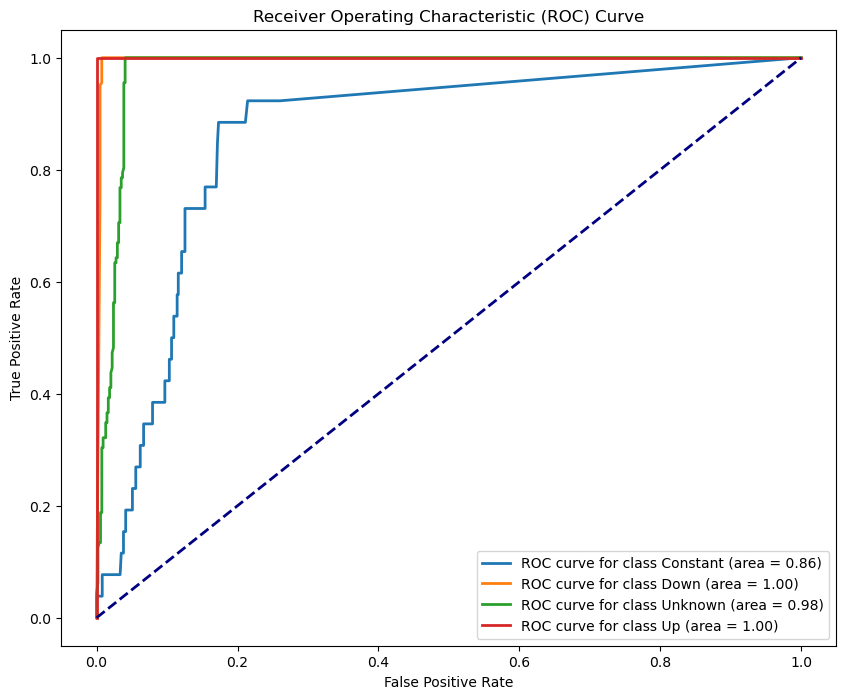

In [ ]:
# Compute ROC curve and ROC area for each class
plt.figure(figsize=(10, 8))
for i in range(len(label_encoder.classes_)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve for class {label_encoder.classes_[i]} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve

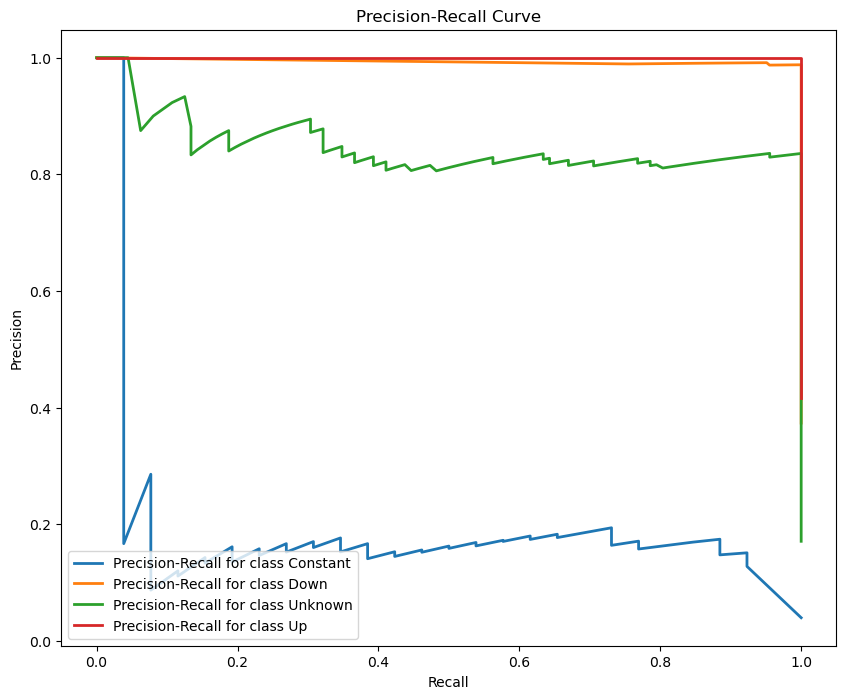

In [ ]:
# Plot Precision-Recall curve for each class
plt.figure(figsize=(10, 8))
for i in range(len(label_encoder.classes_)):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    plt.plot(recall, precision, lw=2, label=f'Precision-Recall for class {label_encoder.classes_[i]}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

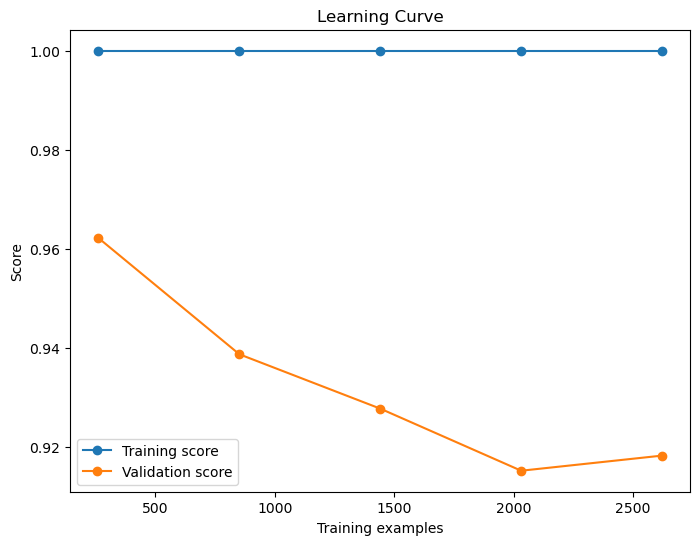

In [ ]:
from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, val_scores = learning_curve(model, X, y, cv=5)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label='Training score')
plt.plot(train_sizes, val_scores.mean(axis=1), 'o-', label='Validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()


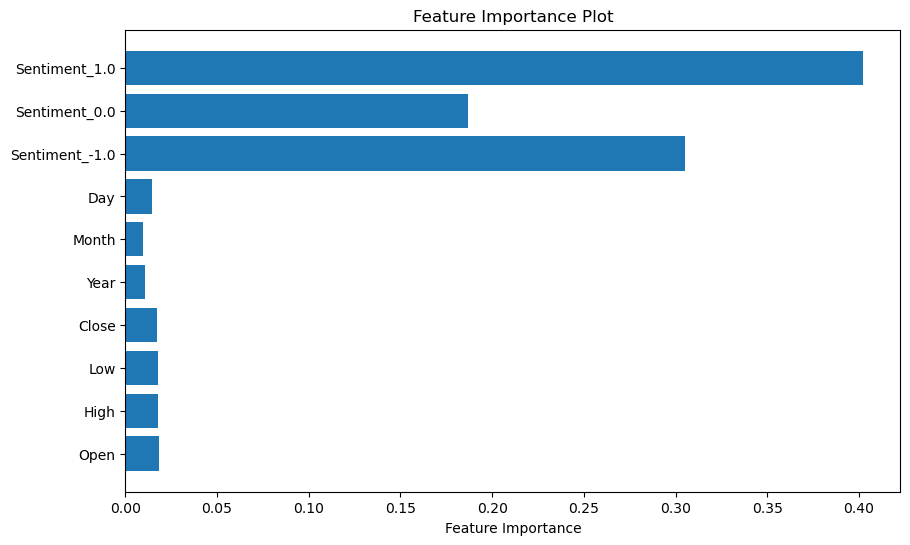

In [ ]:
importances = model.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance Plot')
plt.show()


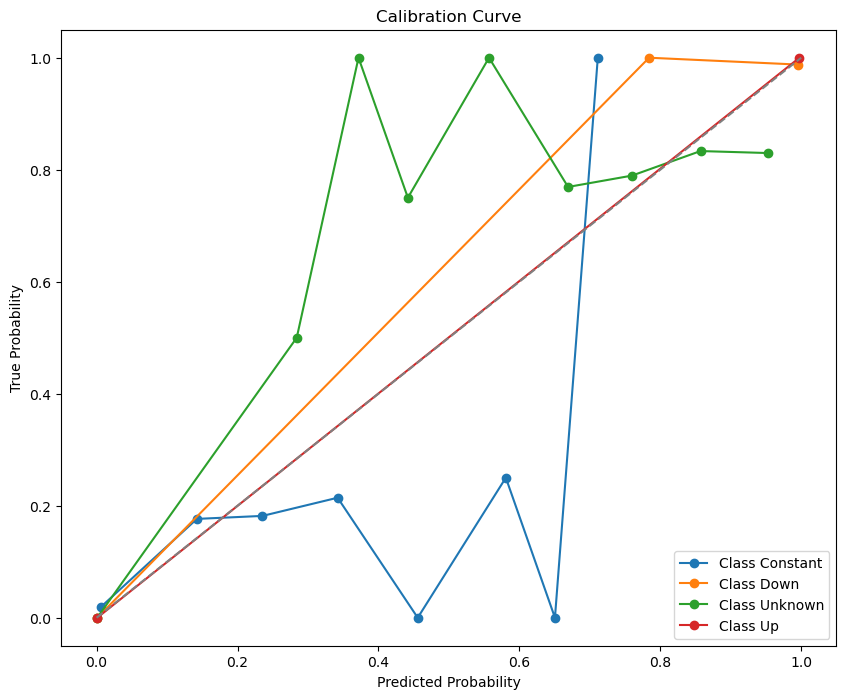

In [ ]:
from sklearn.calibration import calibration_curve

# Calibration curve for each class
plt.figure(figsize=(10, 8))
for i in range(len(label_encoder.classes_)):
    prob_true, prob_pred = calibration_curve(y_test_binarized[:, i], y_pred_prob[:, i], n_bins=10)
    plt.plot(prob_pred, prob_true, marker='o', label=f'Class {label_encoder.classes_[i]}')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.title('Calibration Curve')
plt.legend(loc='lower right')
plt.show()
